<a href="https://colab.research.google.com/github/Rizkyepk/Machine_Learning-Course/blob/main/week6/K_means_Clustering_on_Mall_Costumers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Mounting google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory


In [ ]:
import pandas as pd

# Adjust the file path accordingly
file_path = '/content/drive/MyDrive/Dataset_ML/Mall_Customers.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#Pre-Processing


Drop colom Costumer Id

In [ ]:
# Assuming your dataset has a column named 'Customer ID' that you want to drop
df.drop(columns=['CustomerID'], inplace=True)

# Display the first few rows of the DataFrame to verify the drop operation
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Assuming your dataset has a column named 'genre' that you want to rename to 'gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Display the first few rows of the DataFrame to verify the rename operation
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Step 2: Convert categorical variable 'Genre' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

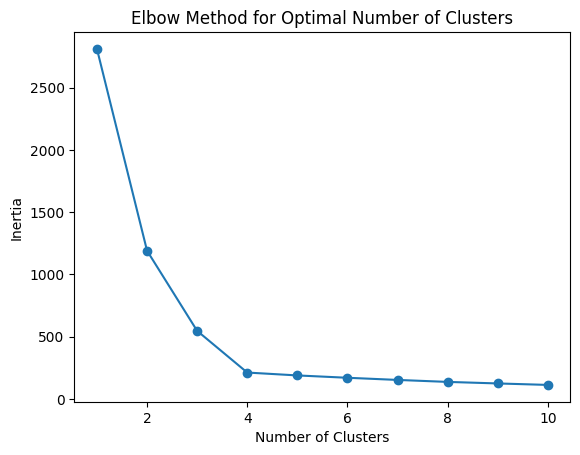

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset (replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate inertia for different number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-962ee892a1f9>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],  cmap='viridis')


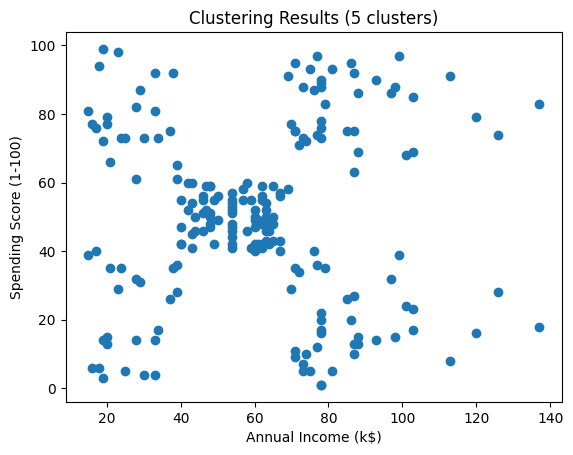

[[45.2173913  26.30434783 20.91304348  0.60869565  0.39130435]
 [32.69230769 86.53846154 82.12820513  0.53846154  0.46153846]
 [40.32432432 87.43243243 18.18918919  0.48648649  0.51351351]
 [43.12658228 54.82278481 49.83544304  0.58227848  0.41772152]
 [25.27272727 25.72727273 79.36363636  0.59090909  0.40909091]]


In [ ]:
# Membuat model KMeans dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']])

# Visualisasi klaster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],  cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Results (5 clusters)')
plt.show()

# Print pusat klaster
print(kmeans.cluster_centers_)

In [ ]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
print('inertia:',inertia)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


inertia: 75476.65900773827
Silhouette Score: 0.44471837236562606
